<a href="https://colab.research.google.com/github/Abhitay/Machine-Learning/blob/main/Comparison_of_Supervised_ML_Models_for_BRFSS_datset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

##Reading the dataset

In [ ]:
diabetes = pd.read_csv('/content/drive/MyDrive/ML_Project/diabetes_012_health_indicators_BRFSS2015.csv')

##Statistical Analysis to understand the dataset

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
diabetes.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
diabetes.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
diabetes_stats = diabetes.groupby(by='Diabetes_012').describe()
print(diabetes_stats.to_string())

                HighBP                                               HighChol                                              CholCheck                                                    BMI                                                       Smoker                                                 Stroke                                              HeartDiseaseorAttack                                              PhysActivity                                                 Fruits                                                Veggies                                              HvyAlcoholConsump                                              AnyHealthcare                                              NoDocbcCost                                                GenHlth                                               MentHlth                                                PhysHlth                                                  DiffWalk                                                    Sex     

In [ ]:
diabetes = diabetes.drop( diabetes[diabetes['Diabetes_012'] == 1].index)

In [ ]:
diabetes.loc[diabetes['Diabetes_012'] == 1.0]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


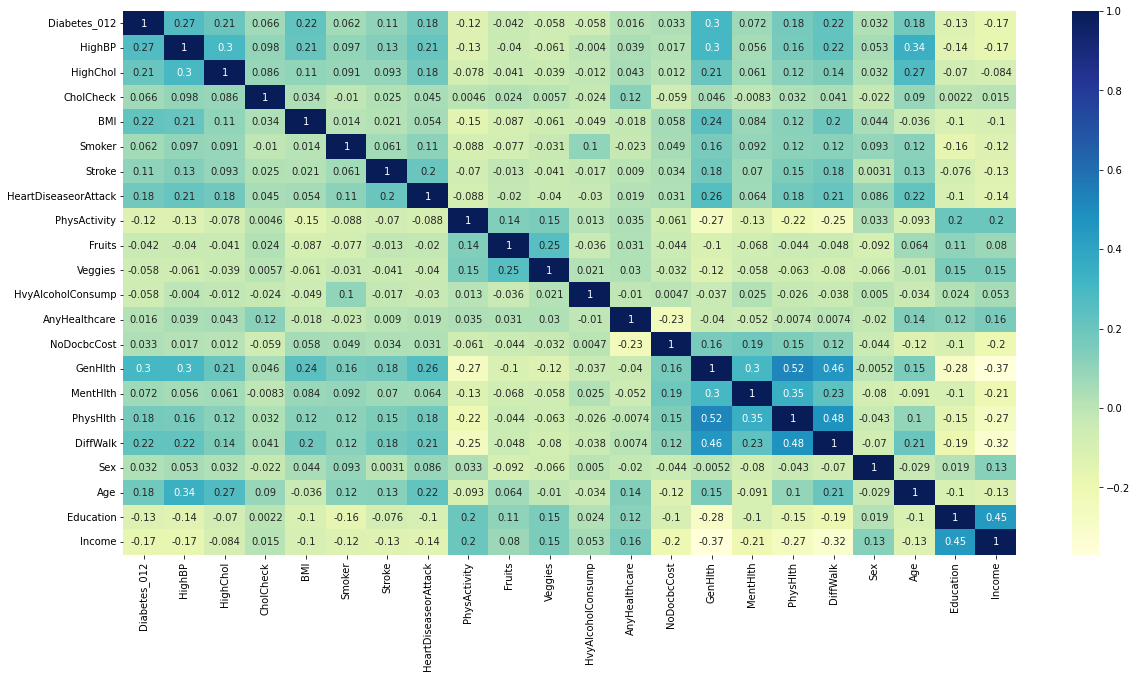

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(diabetes.corr(), annot=True, cmap="YlGnBu")

In [ ]:
tempDup = diabetes.duplicated()
tempDup.value_counts()
diabetes.drop_duplicates(inplace = True)

In [ ]:
tempDup = diabetes.duplicated()
tempDup.value_counts()

False    225152
dtype: int64

In [ ]:
X = diabetes.drop(columns='Diabetes_012',axis = 1)
y = diabetes['Diabetes_012']

In [ ]:
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

f_Scores = pd.concat([df_columns,df_scores],axis=1)
f_Scores.columns = ['Feature','Score']

tempScoreSort = f_Scores.sort_values(by='Score')

In [ ]:
tempScoreSort

,Feature,Score
11,AnyHealthcare,7.878840
2,CholCheck,50.577013
8,Fruits,56.803505
9,Veggies,85.490408
12,NoDocbcCost,95.760773
17,Sex,136.953745
4,Smoker,261.785513
19,Education,500.002168
7,PhysActivity,635.704390
10,HvyAlcoholConsump,949.239117


In [ ]:
remove = ['Fruits' , 'AnyHealthcare' , 'NoDocbcCost' , 'Sex', 'Diabetes_012']
X = diabetes.drop(columns=remove)
y = diabetes['Diabetes_012']

By performing statistical analysis we got to know
1. 253680 datapoints
2. 22 features
3. Can use supervised machine learning models as the true class of the datapoint is provided
4. 500 outcome as negative and 268 as positive
5. We need to normalize the dataset

##Normalizing the independent values and splitting into training and testing sets. 

In [ ]:
sm = SMOTE()
X, y = sm.fit_resample(X, y)

scaler = StandardScaler()
temp = scaler.fit_transform(X)
X = temp

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, stratify = y)

##Testing the data on various models

###K-Nearest Neighbors

In [ ]:
# classifiers = [int(x) for x in range(1,25)]
# training_score = []
# test_score = []

# for i in range(1,25):
#   knn = KNeighborsClassifier(n_neighbors=i)
#   knn.fit(X_train, y_train)
#   training_score.append(knn.score(X_train, y_train))
#   test_score.append(knn.score(X_test, y_test))

# plt.plot(classifiers, training_score, label="Training Score")
# plt.plot(classifiers, test_score, label="Test Score")
# plt.xlabel('Number of Neighbours')
# plt.ylabel('Score')
# plt.legend()

In [ ]:
# print(f'Best test score = {max(test_score)} for the neighbour value of {classifiers[test_score.index(max(test_score))]}')

Taking 16 as the number of neighbours

In [ ]:
# knn = KNeighborsClassifier(n_neighbors=16)
# knn.fit(X_train, y_train)
# print(f'Training Score: {np.round((knn.score(X_train, y_train)),3)}')
# print(f'Training Score: {np.round((knn.score(X_test, y_test)),3)}')

###Logistic regression 


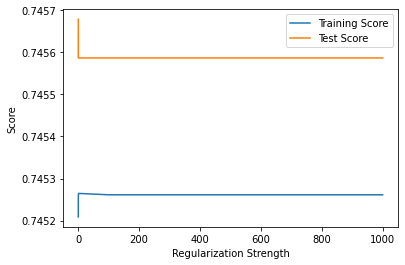

In [ ]:
classifiers = [0.01,0.1,1,100,1000]
training_score = []
test_score = []

for i in classifiers:
  log = LogisticRegression(C = i)
  log.fit(X_train, y_train)
  training_score.append(log.score(X_train, y_train))
  test_score.append(log.score(X_test, y_test))

# for index,i in enumerate(classifiers):
#   print(f'When value of C = {i}\nTraining Score = {np.round((training_score[index]),3)}\nTesting Score = {np.round((test_score[index]),3)}')

plt.plot(classifiers, training_score, label="Training Score")
plt.plot(classifiers, test_score, label="Test Score")
plt.xlabel('Regularization Strength')
plt.ylabel('Score')
plt.legend()

In [ ]:
print(f'Best test score = {max(test_score)} for the strenght of regularization of {classifiers[test_score.index(max(test_score))]}')

Best test score = 0.7456788824287707 for the strenght of regularization of 0.01


In [ ]:
log = LogisticRegression(C=classifiers[test_score.index(max(test_score))])
log.fit(X_train, y_train)
print(f'Training Score: {np.round((log.score(X_train, y_train)),3)}')
print(f'Training Score: {np.round((log.score(X_test, y_test)),3)}')

Training Score: 0.745
Training Score: 0.746


From the graph, we can see that from the 

###Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

print(f'Training Score: {np.round((gnb.score(X_train, y_train)),3)}')
print(f'Testing Score: {np.round((gnb.score(X_test, y_test)),3)}')

Training Score: 0.724
Testing Score: 0.725


###Decision Trees

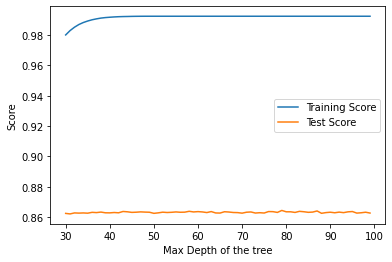

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

classifiers = [int(x) for x in range(30,100)]
training_score = []
test_score = []

for i in classifiers:
  tree = DecisionTreeClassifier(max_depth = i)
  tree.fit(X_train, y_train)
  training_score.append(tree.score(X_train, y_train))
  test_score.append(tree.score(X_test, y_test))

# for index,i in enumerate(classifiers):
#   print(f'When value of C = {i}\nTraining Score = {np.round((training_score[index]),3)}\nTesting Score = {np.round((test_score[index]),3)}')

plt.plot(classifiers, training_score, label="Training Score")
plt.plot(classifiers, test_score, label="Test Score")
plt.xlabel('Max Depth of the tree')
plt.ylabel('Score')
plt.legend()

In [ ]:
print(f'Best test score = {max(test_score)} for the max_depth of {classifiers[test_score.index(max(test_score))]}')

Best test score = 0.8643550551156244 for the max_depth of 79


In [ ]:
tree = DecisionTreeClassifier(max_depth=classifiers[test_score.index(max(test_score))])
tree.fit(X_train, y_train)
print(f'Training Score: {np.round((tree.score(X_train, y_train)),3)}')
print(f'Training Score: {np.round((tree.score(X_test, y_test)),3)}')

Training Score: 0.992
Training Score: 0.863


###Random Forest Classifier

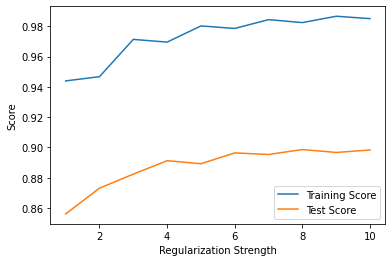

In [ ]:
training_score = []
test_score = []
depth = np.arange(1,11)
for i in range(1,len(depth)+1):
  forest = RandomForestClassifier(n_estimators = i)
  forest.fit(X_train,y_train)
  training_score.append(forest.score(X_train, y_train))
  test_score.append(forest.score(X_test, y_test))
  #print(f'Training Score: {np.round((forest.score(X_train, y_train)),3)}')
  #print(f'Testing Score: {np.round((forest.score(X_test, y_test)),3)}')

plt.plot(depth, training_score, label="Training Score")
plt.plot(depth, test_score, label="Test Score")
plt.xlabel('Regularization Strength')
plt.ylabel('Score')
plt.legend()

In [ ]:
print(f'Best test score = {max(test_score)} for the max_depth of {depth[test_score.index(max(test_score))]}')

Best test score = 0.8986346057720134 for the max_depth of 8


In [ ]:
forest = RandomForestClassifier(n_estimators = depth[test_score.index(max(test_score))])
forest.fit(X_train,y_train)

print(f'Training Score: {np.round((forest.score(X_train, y_train)),3)}')
print(f'Testing Score: {np.round((forest.score(X_test, y_test)),3)}')

Training Score: 0.982
Testing Score: 0.897


###Gradient Boosted Regression Tree

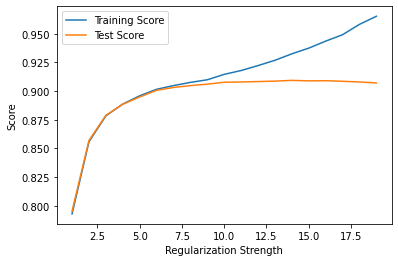

In [ ]:
training_score = []
test_score = []
depth = np.arange(1,20)
for i in range(1,len(depth)+1):
  gbc = XGBClassifier(max_depth=i)
  gbc.fit(X_train,y_train)
  training_score.append(gbc.score(X_train, y_train))
  test_score.append(gbc.score(X_test, y_test))
  # print(f'Training Score: {np.round((gbc.score(X_train, y_train)),3)}')
  # print(f'Testing Score: {np.round((gbc.score(X_test, y_test)),3)}')

plt.plot(depth, training_score, label="Training Score")
plt.plot(depth, test_score, label="Test Score")
plt.xlabel('Regularization Strength')
plt.ylabel('Score')
plt.legend()

In [ ]:
print(f'Best test score = {max(test_score)} for the max_depth of {depth[test_score.index(max(test_score))]}')

Best test score = 0.9093288784825445 for the max_depth of 14


In [ ]:
gbc = XGBClassifier(max_depth=depth[test_score.index(max(test_score))])
gbc.fit(X_train,y_train)

print(f'Training Score: {np.round((gbc.score(X_train, y_train)),3)}')
print(f'Testing Score: {np.round((gbc.score(X_test, y_test)),3)}')

Training Score: 0.932
Testing Score: 0.909


##Proceeding with XGBoost

###Feature Selection

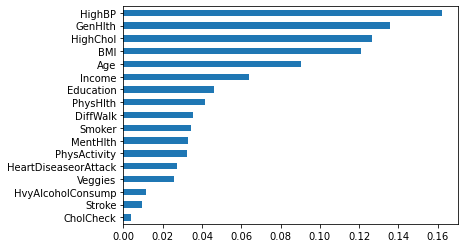

In [ ]:
indexNames = diabetes.drop(columns=remove,axis = 1).columns

testSeries = pd.Series(data = forest.feature_importances_,index = indexNames).sort_values()
testSeries.plot.barh()

In [ ]:
features = testSeries[testSeries >= 0.025].index

###XGBoost

In [ ]:
X = diabetes[features]
y = diabetes['Diabetes_012']

sm = SMOTE()
X, y = sm.fit_resample(X, y)

scaler = StandardScaler()
temp = scaler.fit_transform(X)
X = temp

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, stratify = y)

Training Score: 0.79
Testing Score: 0.789
Training Score: 0.859
Testing Score: 0.856
Training Score: 0.879
Testing Score: 0.878
Training Score: 0.892
Testing Score: 0.89
Training Score: 0.898
Testing Score: 0.897
Training Score: 0.902
Testing Score: 0.9
Training Score: 0.904
Testing Score: 0.903
Training Score: 0.907
Testing Score: 0.904
Training Score: 0.911
Testing Score: 0.905
Training Score: 0.914
Testing Score: 0.906
Training Score: 0.919
Testing Score: 0.907
Training Score: 0.924
Testing Score: 0.907
Training Score: 0.927
Testing Score: 0.908
Training Score: 0.934
Testing Score: 0.907
Training Score: 0.94
Testing Score: 0.908
Training Score: 0.947
Testing Score: 0.907
Training Score: 0.955
Testing Score: 0.907
Training Score: 0.961
Testing Score: 0.907
Training Score: 0.969
Testing Score: 0.907


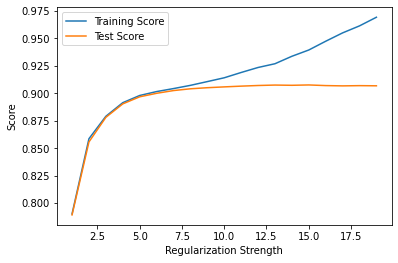

In [ ]:
training_score = []
test_score = []
depth = np.arange(1,20)
for i in range(1,len(depth)+1):
  gbc = XGBClassifier(max_depth=i)
  gbc.fit(X_train,y_train)
  training_score.append(gbc.score(X_train, y_train))
  test_score.append(gbc.score(X_test, y_test))
  print(f'Training Score: {np.round((gbc.score(X_train, y_train)),3)}')
  print(f'Testing Score: {np.round((gbc.score(X_test, y_test)),3)}')

plt.plot(depth, training_score, label="Training Score")
plt.plot(depth, test_score, label="Test Score")
plt.xlabel('Regularization Strength')
plt.ylabel('Score')
plt.legend()

In [ ]:
print(f'Best test score = {max(test_score)} for the max_depth of {depth[test_score.index(max(test_score))]}')

Best test score = 0.9076977716976664 for the max_depth of 15


In [ ]:
gbc = XGBClassifier(max_depth=depth[test_score.index(max(test_score))])
gbc.fit(X_train,y_train)

print(f'Training Score: {np.round((gbc.score(X_train, y_train)),3)}')
print(f'Testing Score: {np.round((gbc.score(X_test, y_test)),3)}')

Training Score: 0.94
Testing Score: 0.908


###Score

Training Score: 0.94
Testing Score: 0.908
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     38011
         2.0       0.96      0.85      0.90     38011

    accuracy                           0.91     76022
   macro avg       0.91      0.91      0.91     76022
weighted avg       0.91      0.91      0.91     76022



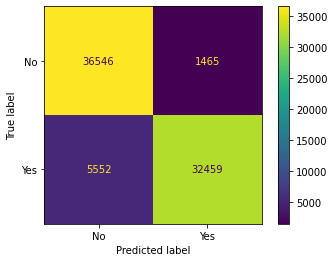

In [ ]:
print(f'Training Score: {np.round((gbc.score(X_train, y_train)),3)}')
print(f'Testing Score: {np.round((gbc.score(X_test, y_test)),3)}')

y_pred = gbc.predict(X_test)

matrix = classification_report(y_test,y_pred )
print(matrix)

cm = confusion_matrix(y_test, y_pred, labels=gbc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['No','Yes'])
disp.plot()

##Final

In [ ]:
gbc = XGBClassifier(max_depth=14 )
gbc.fit(X_train,y_train)

print(f'Training Score: {np.round((gbc.score(X_train, y_train)),3)}')
print(f'Testing Score: {np.round((gbc.score(X_test, y_test)),3)}')

Training Score: 0.931
Testing Score: 0.908


###Score

Training Score: 0.931
Testing Score: 0.908
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     38011
         2.0       0.96      0.85      0.90     38011

    accuracy                           0.91     76022
   macro avg       0.91      0.91      0.91     76022
weighted avg       0.91      0.91      0.91     76022



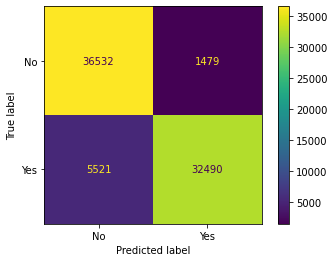

In [ ]:
print(f'Training Score: {np.round((gbc.score(X_train, y_train)),3)}')
print(f'Testing Score: {np.round((gbc.score(X_test, y_test)),3)}')

y_pred = gbc.predict(X_test)

matrix = classification_report(y_test,y_pred )
print(matrix)

cm = confusion_matrix(y_test, y_pred, labels=gbc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['No','Yes'])
disp.plot()